import warnings
warnings.filterwarnings('ignore')

In [1]:
import keras

In [15]:
print(keras.__version__)

2.15.0


In [29]:
import gzip
import numpy as np
from keras.utils import to_categorical # Damit wir den one hot encoding struktur haben

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")


# Hier erstellen wir den OneHotEncoding Struktur 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
    

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [31]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [32]:
from keras.models import Sequential 
from keras.layers import Dense

In [34]:
model = Sequential()

model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='sigmoid'))


# 'categorical_crossentropy', weil wir mehere Ausgänge haben wollen
# 'binary_crossentropy' für zwei Ausgänge
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=1000
)

Epoch 1/10
60/60 [==============================] - 0s 2ms/step - loss: 1.7972 - accuracy: 0.4519
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 1.2562 - accuracy: 0.6611
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0860 - accuracy: 0.7099
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9828 - accuracy: 0.7355
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9081 - accuracy: 0.7528
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.7640
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8026 - accuracy: 0.7731
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7656 - accuracy: 0.7816
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.7879
Epoch 10/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.7927


In [65]:
# Ähnlich zu Score aber hier kriegen wir Verlust 
# (Loss) und Genauigkeit (Accuracy).
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 453us/step - loss: 0.7227 - accuracy: 0.7750


[0.7226722836494446, 0.7749999761581421]

In [66]:
pred = model.predict(X_test)

313/313 [==============================] - 0s 411us/step


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


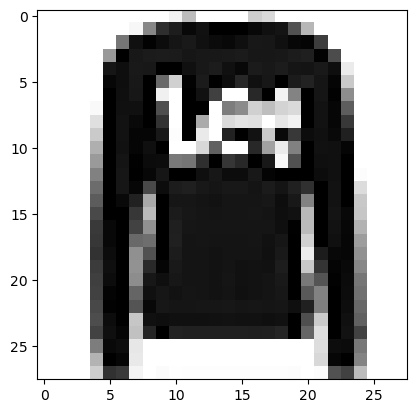

In [68]:
print(y_test[1])

plt.imshow(X_test[1].reshape(-1,28), cmap="gray_r")
plt.show()

In [70]:
import numpy as np

In [73]:
# für welche Klasse haben wir den größte Wahrscheinlichkeit
np.argmax(pred[1])

2

In [78]:
# Für alle Vorhersage
np.argmax(pred, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

### Confusion Matrix

In [79]:
import pandas as pd

In [91]:
y_true = pd.Series(np.argmax(y_test, axis=1), name='actual')
y_pred = pd.Series(np.argmax(pred, axis=1), name='pred')

y_pred.shape, y_true.shape

((10000,), (10000,))

In [92]:
pd.crosstab(y_true, y_pred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,767,3,16,97,11,0,86,0,20,0
1,16,909,14,49,8,0,2,0,2,0
2,30,1,647,13,209,1,84,0,14,1
3,45,12,12,837,44,0,46,0,4,0
4,0,1,159,46,678,0,106,0,10,0
5,1,0,2,2,0,787,1,110,13,84
6,211,2,135,48,158,0,405,0,41,0
7,0,0,0,0,0,41,0,855,2,102
8,4,1,18,12,3,1,20,12,925,4


### Softmax

In [93]:
np.set_printoptions(suppress=True)

def softmax(w):
    e = np.exp(np.array(w))
    dist = e / np.sum(e)
    return dist

def sigmoid(x):
    return 1 / (1 + np.exp(-np.array(x)))

In [97]:
print(sigmoid([10, -2, 0, 0, 0, 0, 0, 0, 0, 0]).sum())
print(softmax([10, -2, 0, 0, 0, 0, 0, 0, 0, 0]).sum())

5.119157524153415
0.9999999999999999


### Neuronales Netz (mit Softmax)

In [125]:
model1 = Sequential()

model1.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model1.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=1000
)

Epoch 1/10
60/60 [==============================] - 0s 2ms/step - loss: 1.7138 - accuracy: 0.4868
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 1.2406 - accuracy: 0.6799
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 1.0561 - accuracy: 0.7213
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9475 - accuracy: 0.7455
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8697 - accuracy: 0.7638
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8140 - accuracy: 0.7732
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7676 - accuracy: 0.7826
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.7898
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.7966
Epoch 10/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.8001


In [129]:
# Ähnlich zu Score aber hier kriegen wir Verlust 
# (Loss) und Genauigkeit (Accuracy).
model1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 441us/step - loss: 0.6878 - accuracy: 0.7909


[0.6877832412719727, 0.7908999919891357]

In [130]:
pred1 = model1.predict(X_test)

313/313 [==============================] - 0s 421us/step


In [131]:
# Mit der Sofmax kriegen wir die korrekte Warhrscheinlichkeit
print(pred[1].sum())
print(pred1[1].sum())

5.023805
1.0


# Aktivierungsfunktion
### Model mit Relu als Aktivierungsfunktion

In [141]:
model2 = Sequential()

model2.add(Dense(100, activation='relu', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model2.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=1000
)

Epoch 1/10
60/60 [==============================] - 0s 2ms/step - loss: 1984.4990 - accuracy: 0.1177
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 2.2147 - accuracy: 0.1462
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 2.2298 - accuracy: 0.1424
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 2.1816 - accuracy: 0.1788
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 2.1645 - accuracy: 0.1832
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 2.0657 - accuracy: 0.2239
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 2.0261 - accuracy: 0.2407
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 1.9737 - accuracy: 0.2576
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 1.9751 - accuracy: 0.2692
Epoch 10/10
60/60 [==============================] - 0s 2ms/step - loss: 2.1109 - accuracy: 0.1922


In [142]:
# Ähnlich zu Score aber hier kriegen wir Verlust 
# (Loss) und Genauigkeit (Accuracy).
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 396us/step - loss: 2.1113 - accuracy: 0.1864


[2.111297369003296, 0.18639999628067017]

### Model mit Tanh als Aktivierungsfunktion

In [143]:
model3 = Sequential()

model3.add(Dense(100, activation='tanh', input_shape=(784,)))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model3.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=1000
)

Epoch 1/10
60/60 [==============================] - 0s 2ms/step - loss: 1.3381 - accuracy: 0.5608
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8909 - accuracy: 0.7023
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.7357
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.7566
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.7647
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7731
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7802
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7857
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7896
Epoch 10/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7944


In [154]:
# Ähnlich zu Score aber hier kriegen wir Verlust 
# (Loss) und Genauigkeit (Accuracy).
model3.evaluate(X_test, y_test)

313/313 [==============================] - 0s 416us/step - loss: 0.6026 - accuracy: 0.7933


[0.6026261448860168, 0.7932999730110168]

# Funktionen für die Optimierung
Gewichte optimieren 
### Adam

In [155]:
model4 = Sequential()

model4.add(Dense(100, activation='tanh', input_shape=(784,)))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model4.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=1000
)

Epoch 1/10
60/60 [==============================] - 0s 2ms/step - loss: 1.0788 - accuracy: 0.6375
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.7520
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7694
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7888
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7879
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7938
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7969
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.8102
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.8042
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.8009


In [149]:
model4.evaluate(X_test, y_test)

313/313 [==============================] - 0s 437us/step - loss: 0.5928 - accuracy: 0.7818


[0.5927858948707581, 0.7817999720573425]

### RMSPROP

In [152]:
model5 = Sequential()

model5.add(Dense(100, activation='tanh', input_shape=(784,)))
model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model5.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=1000
)

Epoch 1/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9805 - accuracy: 0.6648
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.7532
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.7661
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.7786
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5890 - accuracy: 0.7862
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7919
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.7939
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7923
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.8042
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.8016


In [153]:
model5.evaluate(X_test, y_test)

313/313 [==============================] - 0s 418us/step - loss: 0.5560 - accuracy: 0.8016


[0.5559906363487244, 0.8015999794006348]